<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M2/notebooks/M2_Networks_hands_on_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Network Analysis - Application (Python)
### Roman Jurowetzki
Updated 4/10 - 2020

In [109]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

#### Network data structures
* Below an example of a minimal edge list created by zipping together two lists into a list of tuples.

* In this case, let us assume this network to be unweighted, meaning a connection can be eiter tresent or absent.


In [2]:
origin = [1, 2, 2, 1, 4]
target = [2, 3, 4, 5, 1]

In [3]:
edge_list = list(zip(origin, target))

print(edge_list)

[(1, 2), (2, 3), (2, 4), (1, 5), (4, 1)]


This can of cause also be a DataFrame where columns indicate origin and target

In [4]:
df = pd.DataFrame({'origin':origin, 'target':target})

In [5]:
df

origin  target
0       1       2
1       2       3
2       2       4
3       1       5
4       4       1

The NetowrkX library allows us to do many network-related things in Python. While there are other packages for that, NetworkX remains the most popular choice.

A network can be initiated from a list of tuples (more basic) from numpy arrays or from DataFrames

In [6]:
G = nx.Graph()

In [7]:
G.add_edges_from(edge_list)

In [8]:
G_from_df = nx.from_pandas_edgelist(df, source = 'origin', target = 'target')

In [9]:
print(G.nodes() == G_from_df.nodes())
print(G.edges() == G_from_df.edges())

True
True



#### Adjacency Matrix

* A second popular form of network representation is the **adjacency-matrix** (also called **socio-matrix**).
* It is represented as a $n*n$ matrix, where $n$ stands for the number of elements of which their relationships should be represented.
* The value in the cell that intercepts row $n$ and column $m$ indicates if an edge is present (=1) or absent (=0).
* Tip: Given an edgelist, an adjacency matrix can easily be produced by crosstabulating:



In [10]:
df_cros = pd.crosstab(df.origin, df.target)

In [11]:
df_cros

target  1  2  3  4  5
origin               
1       0  1  0  0  1
2       0  0  1  1  0
4       1  0  0  0  0

In [12]:
idx = df_cros.columns.union(df_cros.index)
df_adj_asy = df_cros.reindex(index = idx, columns=idx, fill_value=0)

In [13]:
df_adj_asy

1  2  3  4  5
1  0  1  0  0  1
2  0  0  1  1  0
3  0  0  0  0  0
4  1  0  0  0  0
5  0  0  0  0  0

In [14]:
nx.to_pandas_adjacency(G)

1    2    3    4    5
1  0.0  1.0  0.0  1.0  1.0
2  1.0  0.0  1.0  1.0  0.0
3  0.0  1.0  0.0  0.0  0.0
4  1.0  1.0  0.0  0.0  0.0
5  1.0  0.0  0.0  0.0  0.0

In [15]:
df_adj_asy + df_adj_asy.T

1  2  3  4  5
1  0  1  0  1  1
2  1  0  1  1  0
3  0  1  0  0  0
4  1  1  0  0  0
5  1  0  0  0  0

In [16]:
from scipy import sparse

In [17]:
sparse_df = sparse.csr_matrix(df_adj_asy)

In [18]:
print(sparse_df)

  (0, 1)	1
  (0, 4)	1
  (1, 2)	1
  (1, 3)	1
  (3, 0)	1


In [19]:
edge_list

[(1, 2), (2, 3), (2, 4), (1, 5), (4, 1)]

## Nodelists
* Edgelists as well as adjacency matrices only stores connectivity pattern between nodes, but due to their structure cannot store informations on the nodes in which we might be interested.
* Therefore, we in many cases also provide a a **node list** with these informations (such as the names of the nodes or any kind of groupings).


In [20]:
name = ["Jesper", "Pernille", "Jacob", "Dorte", "Donald"]
sex = ["M", "F", "M", "F", "M"]
group = ["A", "B", "B", "A", "C"]

node_list = pd.DataFrame({'name':name, 'sex':sex, 'group':group})

In [21]:
node_list

name sex group
0    Jesper   M     A
1  Pernille   F     B
2     Jacob   M     B
3     Dorte   F     A
4    Donald   M     C

#### NetworkX Graphs

We have already seen a sneak-preview of NetworkX functionality

There are many weays to create various types of Graph objects in NetworkX and I'd advise you to have a look at the [documentation](https://networkx.github.io/documentation/stabl)

Let's combine the data from above and create a graph. While it is easy to create a graph from an edgelist it cannot be inferred from a nodelist directly.


In [22]:
dict(enumerate(name))

{0: 'Jesper', 1: 'Pernille', 2: 'Jacob', 3: 'Dorte', 4: 'Donald'}

In [23]:
mapper = dict(enumerate(name, 1))

print(mapper)

{1: 'Jesper', 2: 'Pernille', 3: 'Jacob', 4: 'Dorte', 5: 'Donald'}


In [24]:
print([mapper[x] for x in origin])

origin = [mapper[x] for x in origin]
target = [mapper[x] for x in target]

['Jesper', 'Pernille', 'Pernille', 'Jesper', 'Dorte']


In [25]:
edge_list = list(zip(origin, target))

print(edge_list)

[('Jesper', 'Pernille'), ('Pernille', 'Jacob'), ('Pernille', 'Dorte'), ('Jesper', 'Donald'), ('Dorte', 'Jesper')]


In [26]:
G = nx.Graph()

In [27]:
G.add_edges_from(edge_list)

In [28]:
node_attr = node_list.set_index('name').to_dict('index')

In [29]:
node_attr

{'Donald': {'group': 'C', 'sex': 'M'},
 'Dorte': {'group': 'A', 'sex': 'F'},
 'Jacob': {'group': 'B', 'sex': 'M'},
 'Jesper': {'group': 'A', 'sex': 'M'},
 'Pernille': {'group': 'B', 'sex': 'F'}}

In [30]:
nx.set_node_attributes(G, node_attr)

In [31]:
G.nodes(data=True)

NodeDataView({'Jesper': {'sex': 'M', 'group': 'A'}, 'Pernille': {'sex': 'F', 'group': 'B'}, 'Jacob': {'sex': 'M', 'group': 'B'}, 'Dorte': {'sex': 'F', 'group': 'A'}, 'Donald': {'sex': 'M', 'group': 'C'}})

In [32]:
G.edges()

EdgeView([('Jesper', 'Pernille'), ('Jesper', 'Donald'), ('Jesper', 'Dorte'), ('Pernille', 'Jacob'), ('Pernille', 'Dorte')])

In [33]:
len(G.nodes())

5

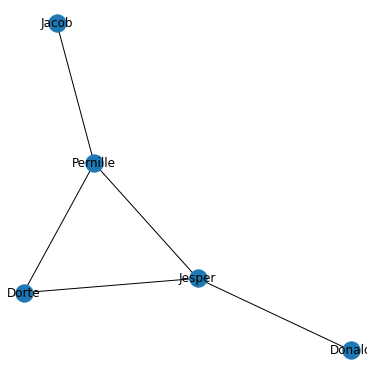

In [34]:
# Not pretty at all
plt.figure(figsize=(5,5)) 
nx.draw_kamada_kawai(G, with_labels = True)

In [35]:
G['Jacob']

AtlasView({'Pernille': {}})

In [36]:
G['Jesper']

AtlasView({'Pernille': {}, 'Donald': {}, 'Dorte': {}})

In [37]:
G.nodes()['Jesper']

{'group': 'A', 'sex': 'M'}

In [38]:
[node for node, data in G.nodes(data=True) if data['sex'] == 'F']

['Pernille', 'Dorte']

In [39]:
node_list[node_list.sex == 'F'].name

1    Pernille
3       Dorte
Name: name, dtype: object

In [40]:
G_sub = nx.subgraph(G, node_list[node_list.sex == 'F'].name)

In [41]:
pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

sex group
Jesper     M     A
Pernille   F     B
Jacob      M     B
Dorte      F     A
Donald     M     C

## Network analysis and measures

In [42]:
# Generate sample small world network
g = nx.watts_strogatz_graph(200, 3 , 5)

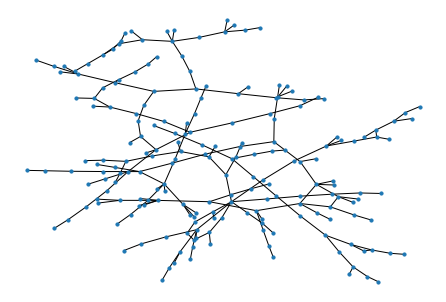

In [43]:
# Quick visualization
nx.draw(g, with_labels = False, node_size=10)

#### Node level measures

Centralities can be easily created on node level [various centrality algorithms](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html).



In [44]:
centrality_dgr = nx.degree_centrality(g)
centrality_eigen = nx.eigenvector_centrality_numpy(g)
centrality_between = nx.betweenness_centrality(g)

In [45]:
nd_attrb_df = pd.DataFrame({'centrality_dgr':centrality_dgr,
                           'centrality_eigen':centrality_eigen,
                           'centrality_between':centrality_between})

In [46]:
nd_attrb = nd_attrb_df.to_dict('index')

In [47]:
nx.set_node_attributes(g, nd_attrb)

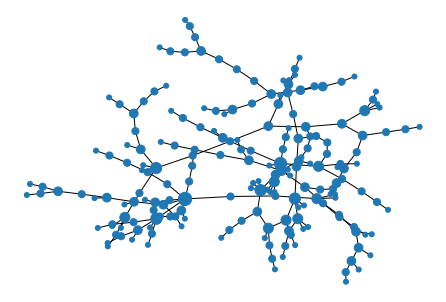

In [48]:
# Degree centrality
nx.draw(g, with_labels = False, node_size=[v * 5000 for v in centrality_dgr.values()])

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


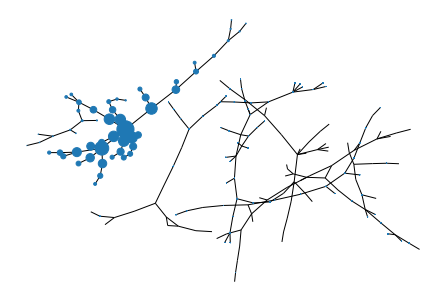

In [49]:
# Eigenvalue centrality
nx.draw(g, with_labels = False, node_size=[v * 500 for v in centrality_eigen.values()])

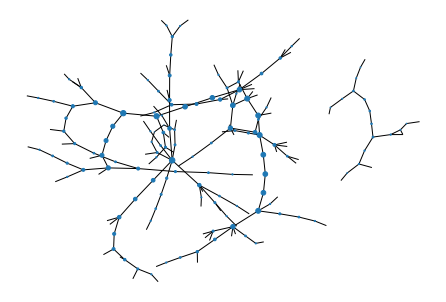

In [50]:
# Betweenness centrality
nx.draw(g, with_labels = False, node_size=[v * 500 for v in centrality_between.values()])

### Clustering (Community detection)

* Clustering algorithms are similar to UML algorithms in traditional ML - there are many diffrent approaches and the data structure is often the determinant of what is makes sense and should be used.

* While there are several community detection algorithms in the NetworkX library, one of the most known and used - the Louvain algorithm is maintained as an own package (http://python-louvain.readthedocs.io/)

* It is used in a very similar fashion to other functions in NetworkX and returns similar objects.



In [51]:
G = nx.random_partition_graph(np.random.randint(15,18,5), 0.75, 0.05)

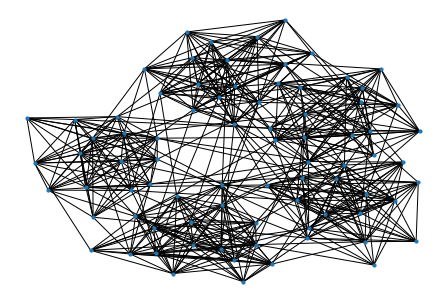

In [52]:
nx.draw_kamada_kawai(G, node_size=10)

In [53]:
import community as community_louvain

In [54]:
partition = community_louvain.best_partition(G)

In [55]:
nx.set_node_attributes(G, partition, 'partition')

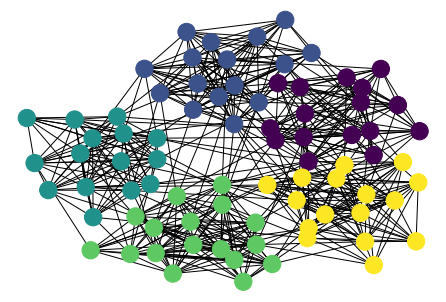

In [56]:
nx.draw_kamada_kawai(G, node_color=list(partition.values()))


#### Neighborhood of a Node

* Lets check the size of all nodes neighborhood at distance 2.



In [57]:
g1 = nx.ego_graph(G, 1, radius=2)
g50 = nx.ego_graph(G, 50, radius=2)

In [58]:
g1_df = pd.DataFrame.from_dict(dict(g1.nodes(data=True)), orient='index')
g50_df = pd.DataFrame.from_dict(dict(g50.nodes(data=True)), orient='index')

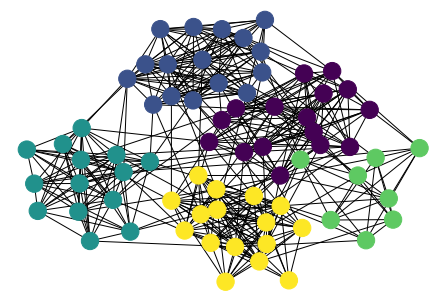

In [59]:
nx.draw_kamada_kawai(g1, node_color=g1_df.partition)

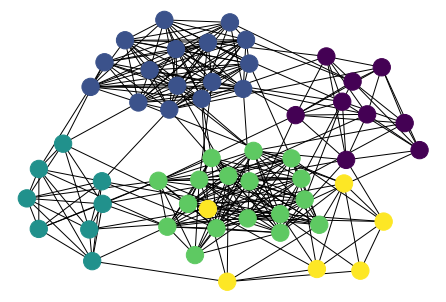

In [60]:
nx.draw_kamada_kawai(g50, node_color=g50_df.partition)


## (Global) Network structure

* Finally, it is often also informative to look at the overal characteristics of the network. We will do this in more detail next time, but just so you know:

* The **density** of a measure represents the share of all connected to all possible connections in the network



In [61]:
nx.density(G)

0.1787974683544304


**Transistivity**, also called the **Clustering Cefficient** indicates how much the network tends to be locally clustered.
* That is measured by the share of **closed triplets**. Again, we will dig into that next time.



In [62]:
nx.transitivity(G)

0.5248217586480063


* The **diameter** is the longest of the shortest paths between two nodes of the network.



In [63]:
nx.diameter(G)

4


* Finally, the **mean distance**, or **average path lenght** represents the mean of all shortest paths between all nodes. It is a measure of diffusion potential within a network.



In [64]:
nx.average_shortest_path_length(G)

2.086392405063291



# Case: Networks are coming...

![](https://sds-aau.github.io/SDS-master/00_media/random_got.jpg)

* So, lets get serious. Appropriate for the weather these days in Denmark, the theme is "winter is comming...".
* Therefore, we will have some fun analysing the Game of Thrones data provided by [Andrew Beveridge](https://github.com/mathbeveridge/asoiaf).
* It is a Character Interaction Networks for George R. R. Martin's "A Song of Ice and Fire" saga (yes, we are talking about the books...).
* These networks were created by connecting two characters whenever their names (or nicknames) appeared within 15 words of one another in one of the books in "A Song of Ice and Fire."
* The edge weight corresponds to the number of interactions.
* This is a nice skill you will have after the second part of M2 on your own.

## Build the graph

* First, we load all nodes, representing all characters appearing in the books:



In [65]:
edges = pd.read_csv('https://sds-aau.github.io/SDS-master/00_data/GoT_network/asoiaf-all-edges.csv')

In [66]:
edges.head()

Source            Target        Type  id  weight
0  Addam-Marbrand     Brynden-Tully  Undirected   0       3
1  Addam-Marbrand  Cersei-Lannister  Undirected   1       3
2  Addam-Marbrand       Gyles-Rosby  Undirected   2       3
3  Addam-Marbrand   Jaime-Lannister  Undirected   3      14
4  Addam-Marbrand      Jalabhar-Xho  Undirected   4       3

In [67]:
edges.columns = [w.lower() for w in edges.columns]

* So, that's what we have, a classical edgelist, with id1 in column 1 and id2 in column2.
* Note, the edges are in this case weighted.

Ok, lets see how many characters we have overall.



In [71]:
pd.concat([edges['source'],edges['target']], axis=0).nunique()

796

In [74]:
len(set(edges['source']) | set(edges['target']))

796


* Because there are so many characters in the books, many of them minor,
* I am subsetting the data to the 100 characters with the most interactions across all books.
* The edges are undirected, therefore there are no redundant Source-Target combinations.
* Because of this, I pivot Source and Target data before summing up the weights.

In [84]:
edges_melt = pd.melt(edges, id_vars=['id','weight'], value_vars=['source', 'target'], 
        var_name='role', value_name='name')

edges_melt.head()

id  weight    role            name
0   0       3  source  Addam-Marbrand
1   1       3  source  Addam-Marbrand
2   2       3  source  Addam-Marbrand
3   3      14  source  Addam-Marbrand
4   4       3  source  Addam-Marbrand

In [86]:
edges_melt.groupby('name').weight.sum().sort_values(ascending=False)

name
Tyrion-Lannister     2873
Jon-Snow             2757
Cersei-Lannister     2232
Joffrey-Baratheon    1762
Eddard-Stark         1649
                     ... 
Shadd                   3
Sawane-Botley           3
Byam-Flint              3
Sarella-Sand            3
Maron-Greyjoy           3
Name: weight, Length: 796, dtype: int64

In [87]:
chars_main = edges_melt.groupby('name').weight.sum().sort_values(ascending=False).index[:100]


* So far so good, if we only go by edge weights,
* Lets reduce our edgelist to this main characters, just to warm up and keep the overview.



In [89]:
edges = edges[(edges.source.isin(chars_main)) & (edges.target.isin(chars_main))]

Now we can convert that into a NetowkrX graph

In [92]:
g = nx.from_pandas_edgelist(edges, source='source', target='target', edge_attr='weight')

In [102]:
# no need to filter for parallel edges and seems there are no isolates (degree 0 nodes)
list(nx.isolates(g))

[]

In [104]:
g.edges(data=True)

EdgeDataView([('Aemon-Targaryen-(Maester-Aemon)', 'Alliser-Thorne', {'weight': 7}), ('Aemon-Targaryen-(Maester-Aemon)', 'Bowen-Marsh', {'weight': 4}), ('Aemon-Targaryen-(Maester-Aemon)', 'Eddison-Tollett', {'weight': 3}), ('Aemon-Targaryen-(Maester-Aemon)', 'Gilly', {'weight': 20}), ('Aemon-Targaryen-(Maester-Aemon)', 'Grenn', {'weight': 5}), ('Aemon-Targaryen-(Maester-Aemon)', 'Janos-Slynt', {'weight': 5}), ('Aemon-Targaryen-(Maester-Aemon)', 'Jeor-Mormont', {'weight': 25}), ('Aemon-Targaryen-(Maester-Aemon)', 'Jon-Snow', {'weight': 110}), ('Aemon-Targaryen-(Maester-Aemon)', 'Mance-Rayder', {'weight': 5}), ('Aemon-Targaryen-(Maester-Aemon)', 'Pypar', {'weight': 5}), ('Aemon-Targaryen-(Maester-Aemon)', 'Robert-Baratheon', {'weight': 5}), ('Aemon-Targaryen-(Maester-Aemon)', 'Samwell-Tarly', {'weight': 99}), ('Aemon-Targaryen-(Maester-Aemon)', 'Stannis-Baratheon', {'weight': 12}), ('Alliser-Thorne', 'Bowen-Marsh', {'weight': 3}), ('Alliser-Thorne', 'Grenn', {'weight': 3}), ('Alliser-Thor

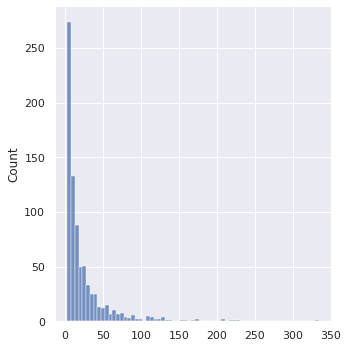

In [110]:
weights = [z['weight'] for x,y,z in g.edges(data=True)]
sns.displot(weights)


We see a right skewed distribution with many weak and some very strong edges. Lets take a look what are the edges with the highest weight (meaning here: the characters with most intraction).



In [113]:
centrality_dgr = nx.degree_centrality(g)
centrality_eigen = nx.eigenvector_centrality_numpy(g, weight='weight')
centrality_between = nx.betweenness_centrality(g, weight='weight')

In [114]:
nx.set_node_attributes(g, centrality_dgr, 'centrality_dgr')
nx.set_node_attributes(g, centrality_eigen, 'centrality_eigen')
nx.set_node_attributes(g, centrality_between, 'centrality_between')

In [117]:
g.nodes(data=True)['Tyrion-Lannister']

{'centrality_between': 0.03467326324469181,
 'centrality_dgr': 0.5454545454545455,
 'centrality_eigen': 0.3789114457918315}

In [120]:
g.degree(weight='weight')['Tyrion-Lannister']

2170


## Communities & Groups



In [121]:
partition = community_louvain.best_partition(g)

In [122]:
nx.set_node_attributes(g, partition, 'community')

In [129]:
nodes_df = pd.DataFrame.from_dict(dict(g.nodes(data=True)),orient='index')

In [141]:
nodes_df.groupby('community')['centrality_eigen'].nlargest(5)

community                                 
0          Jon-Snow                           0.165477
           Samwell-Tarly                      0.059171
           Jeor-Mormont                       0.048872
           Janos-Slynt                        0.036871
           Aemon-Targaryen-(Maester-Aemon)    0.031288
1          Robert-Baratheon                   0.287403
           Eddard-Stark                       0.286136
           Stannis-Baratheon                  0.152189
           Varys                              0.139816
           Petyr-Baelish                      0.136667
2          Robb-Stark                         0.174454
           Catelyn-Stark                      0.165325
           Bran-Stark                         0.127022
           Rickon-Stark                       0.048728
           Theon-Greyjoy                      0.048281
3          Barristan-Selmy                    0.048767
           Daenerys-Targaryen                 0.030154
           Jorah-Mormo


## Network Visualization I

Ok, lets give it a first minimal shot:



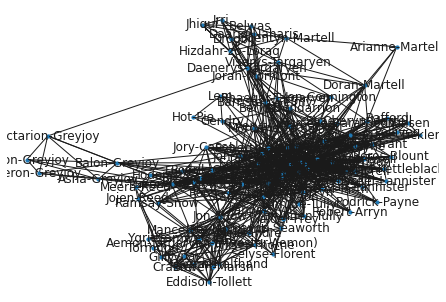

In [142]:
nx.draw(g, with_labels = True, node_size=10)

In [143]:
!pip install -qq holoviews
!pip install -qq -U bokeh
!pip install -qq datashader

     |████████████████████████████████| 8.8MB 2.8MB/s 
     |████████████████████████████████| 2.2MB 40.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 15.5MB 307kB/s 
     |████████████████████████████████| 1.6MB 39.9MB/s 
     |████████████████████████████████| 81kB 5.4MB/s 
     |████████████████████████████████| 92kB 6.2MB/s 
     |████████████████████████████████| 655kB 41.0MB/s 
     |████████████████████████████████| 102kB 5.1MB/s 
ERROR: distributed 2.29.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
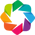

In [144]:
# Import the libraries and link to the bokeh backend
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show
kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))


In [154]:
# Create and save a layout.
g_layout = nx.layout.spring_layout(g) 
g_plot = hv.Graph.from_networkx(g, g_layout).opts(tools=['hover'], node_color='community')
labels = hv.Labels(g_plot.nodes, ['x', 'y'], 'index')

In [155]:
from holoviews.operation.datashader import datashade, bundle_graph
bundled = bundle_graph(g_plot)

In [156]:
show(hv.render(bundled * labels.opts(text_font_size='6pt', text_color='white', bgcolor='gray')))